In [102]:
import cv2 as cv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors  import KNeighborsClassifier 
from skimage.feature import hog
import glob
from collections import defaultdict
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Testing Image for Different Features

(6000, 4000, 3)


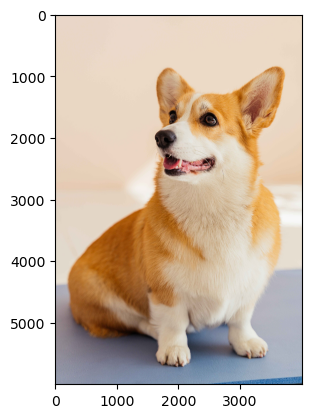

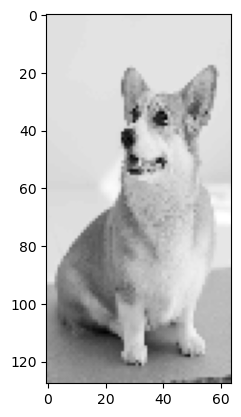

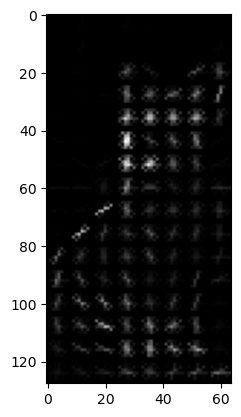

In [103]:

imgs = np.array(cv.imread('./corgi.jpg'))
rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
resize_img = cv.resize(rgb,(64,128))
gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
feature , hog_img= hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True)
avg_color = np.average(resize_img, axis=0)
R,G,B = np.average(avg_color, axis=0)
print(imgs.shape)
plt.imshow(rgb)
plt.show()
plt.imshow(gray, cmap="gray")
plt.show() 
plt.imshow(hog_img,cmap="gray")
plt.show() 

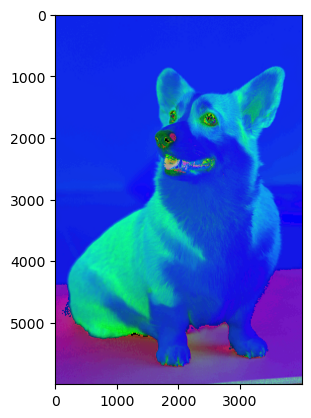

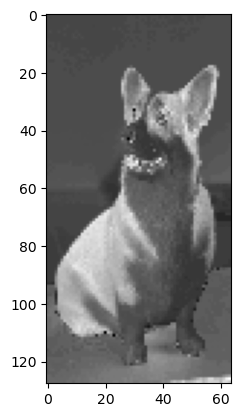

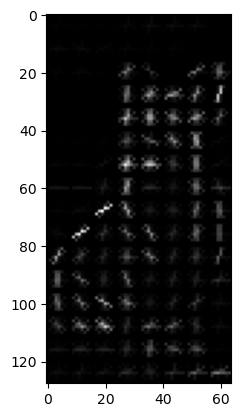

In [104]:
hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)
resize_img = cv.resize(hsv,(64,128))
gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
feature , hog_img= hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True,channel_axis = None)
plt.imshow(hsv)
plt.show()
plt.imshow(gray,cmap="gray")
plt.show()
plt.imshow(hog_img,cmap="gray")
plt.show()

136
255
204.0


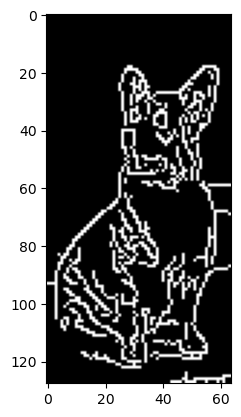

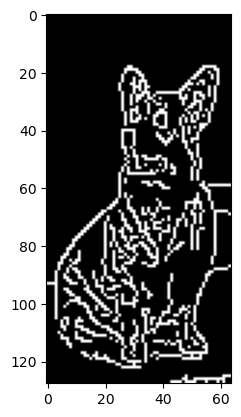

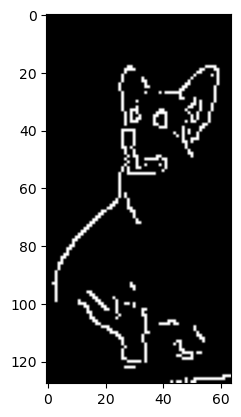

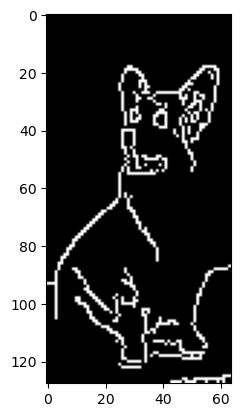

' cv.imshow("Wide Edge Map", wide)\ncv.imshow("Mid Edge Map", mid)\ncv.imshow("Tight Edge Map", tight)\ncv.waitKey(10000) \ncv.destroyAllWindows()\ncv.waitKey(50) '

In [105]:

def auto_canny(imgs, sigma=0.15):
	# find the median
	median_pixel = np.median(imgs)
	# auto Canny
	lower = int(max(0, (1.0 - sigma) * median_pixel))
	upper = int(min(255, (1.0 + sigma) * median_pixel))
	edge_value = cv.Canny(imgs, lower, upper)
	# return the edged image
	return edge_value,lower,upper,median_pixel

 
gray = cv.cvtColor(rgb, cv.COLOR_RGB2GRAY)
blurred = cv.GaussianBlur(gray,(7,7),0)
resize_img = cv.resize(blurred,(64,128))

auto,lower,upper,median_pixel = auto_canny(resize_img,sigma=0.33)
wide = cv.Canny(resize_img, 10, 200)
mid = cv.Canny(resize_img, 50, 120)
tight = cv.Canny(resize_img, 240, 250)

print(lower)
print(upper)
print(median_pixel)
plt.imshow(wide,cmap="gray")
plt.show() 
plt.imshow(mid,cmap="gray")
plt.show() 
plt.imshow(tight,cmap="gray")
plt.show() 
plt.imshow(auto,cmap="gray")
plt.show() 
""" cv.imshow("Wide Edge Map", wide)
cv.imshow("Mid Edge Map", mid)
cv.imshow("Tight Edge Map", tight)
cv.waitKey(10000) 
cv.destroyAllWindows()
cv.waitKey(50) """

---------
# Data Augmentation

### Add Noise & Rotation

#### Sapmple Images

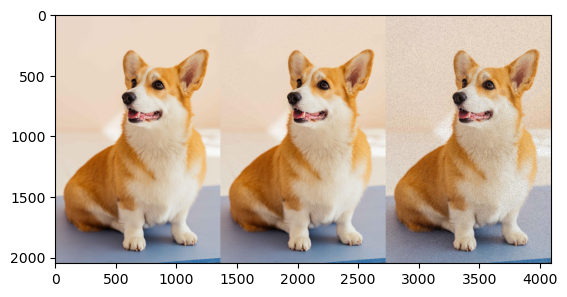

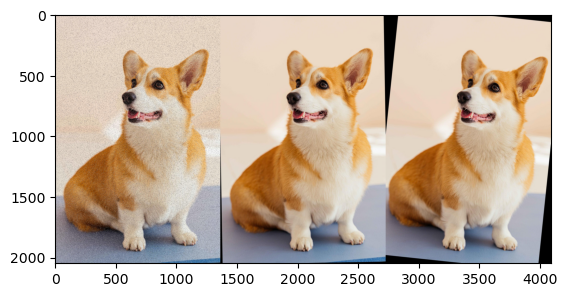

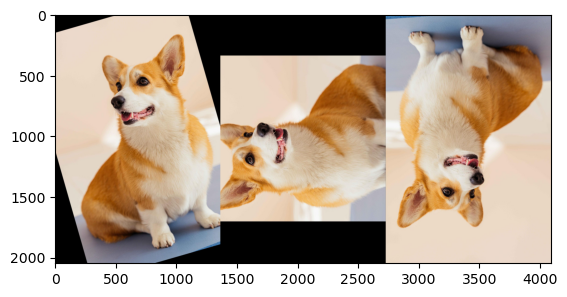

In [106]:
imgs1 = np.array(cv.imread('./Testing_Image//corgi1.jpg'))
rgb1 = cv.cvtColor(imgs1, cv.COLOR_BGR2RGB)
imgs2 = np.array(cv.imread('./Testing_Image//corgi2.jpg'))
rgb2 = cv.cvtColor(imgs2, cv.COLOR_BGR2RGB) 
imgs3 = np.array(cv.imread('./Testing_Image//corgi3.jpg'))
rgb3 = cv.cvtColor(imgs3, cv.COLOR_BGR2RGB) 
imgs4 = np.array(cv.imread('./Testing_Image//corgi4.jpg'))
rgb4 = cv.cvtColor(imgs4, cv.COLOR_BGR2RGB) 
imgs5 = np.array(cv.imread('./Testing_Image//corgi5.jpg'))
rgb5 = cv.cvtColor(imgs5, cv.COLOR_BGR2RGB) 
imgs6 = np.array(cv.imread('./Testing_Image//corgi6.jpg'))
rgb6 = cv.cvtColor(imgs6, cv.COLOR_BGR2RGB) 
imgs7 = np.array(cv.imread('./Testing_Image//corgi7.jpg'))
rgb7 = cv.cvtColor(imgs7, cv.COLOR_BGR2RGB) 
imgs8 = np.array(cv.imread('./Testing_Image//corgi8.jpg'))
rgb8 = cv.cvtColor(imgs8, cv.COLOR_BGR2RGB) 
imgs9 = np.array(cv.imread('./Testing_Image//corgi9.jpg'))
rgb9 = cv.cvtColor(imgs9, cv.COLOR_BGR2RGB) 

add = cv.hconcat([rgb1, rgb2, rgb3])
add1 = cv.hconcat([rgb4, rgb5, rgb6])
add2 = cv.hconcat([rgb7, rgb8, rgb9])

plt.imshow(add)
plt.show()
plt.imshow(add1)
plt.show()
plt.imshow(add2)
plt.show()

-----------
# Feature Extraction

In [107]:
# Corgi = 0, German = 1, Golden = 2

# Load Infomation into list
df_dict = defaultdict(list)

def toDict(file_name,classes,height,width,d,R,G,B):
    df_dict['file_name'].append(file_name)
    df_dict['height'].append(height)
    df_dict['width'].append(width)
    df_dict['resolution'].append(height*width)
    df_dict['dimension'].append(d)
    df_dict['R'].append(R)
    df_dict['G'].append(G)
    df_dict['B'].append(B)
    df_dict['classes'].append(classes)

# Resize Grayscale for Min Max PCA
def Grayscale(img):
    imgs = np.array(cv.imread(img))
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    resize_img = cv.resize(rgb,(64,128))
    gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
    pixel = gray.flatten()
    pixel = pixel.astype(np.uint8)
    return pixel

# Hog Resize Grayscale
def grayHog(img):
    imgs = np.array(cv.imread(img))
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    resize_img = cv.resize(rgb,(64,128))
    gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
    feature = hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2))
    return feature

# HSV HOG Grayscale
def HSV_HOG(img):
    imgs = np.array(cv.imread(img))
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)
    resize_img = cv.resize(hsv,(64,128))
    gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
    feature = hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2))
    return feature

# Canny Edge
def Egde(img):
    imgs = np.array(cv.imread(img))
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(rgb, cv.COLOR_RGB2GRAY)
    blurred = cv.GaussianBlur(gray,(7,7),0)
    resize_img = cv.resize(blurred,(64,128))
    #wide = cv.Canny(resize_img, 10, 200)
    mid = cv.Canny(resize_img, 50, 120)
    #tight = cv.Canny(resize_img, 240, 250)
    pixel_Edge = mid.flatten()
    pixel_Edge = pixel_Edge.astype(np.uint8)
    return pixel_Edge

# Infomation For EDA
def image_info(img):
    file_path = img
    file_name = os.path.basename(file_path)
    imgs = cv.imread(img)
    height, width, d = imgs.shape
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    resize_img = cv.resize(rgb,(64,128))
    avg_color = np.average(rgb, axis=0)
    R,G,B = np.average(avg_color, axis=0)
    return file_name,height,width,d,R,G,B



--------
# Training Set

In [108]:

X_train = []
y_train = []

X_HSV_train = []
y_HSV_train = []

X_HOG_train = []
y_HOG_train = []

X_Edge_train = []
y_Edge_train = []



# Corgi
for i, Corgi in enumerate(glob.glob('./Corgi_Filtered/train/Corgi/*.jpg')):
    try:
        classes = 0
        # EDA
        file_name,height,width,d,R,G,B = image_info(Corgi)
        toDict(file_name,classes,height,width,d,R,G,B)

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Corgi)
        X_train.append(normal_gray)
        y_train.append(0)
        
        # Grayscale to Hog
        normal_HOG = grayHog(Corgi)
        X_HOG_train.append(normal_HOG)
        y_HOG_train.append(0)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(Corgi)
        X_HSV_train.append(hsv)
        y_HSV_train.append(0)

        # Canny Edge to 64x128
        edge = Egde(Corgi)
        X_Edge_train.append(edge)
        y_Edge_train.append(0)

    except Exception:
        pass
# German
for i, German in enumerate(glob.glob('./German_Filtered/train/German/*.jpg')):
    try:
        classes = 1
        # EDA
        file_name,height,width,d,R,G,B = image_info(German)
        toDict(file_name,classes,height,width,d,R,G,B)
        
        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(German)
        X_train.append(normal_gray)
        y_train.append(1)
        
        # Grayscale to Hog
        normal_HOG = grayHog(German)
        X_HOG_train.append(normal_HOG)
        y_HOG_train.append(1)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(German)
        X_HSV_train.append(hsv)
        y_HSV_train.append(1)

        # Canny Edge to 64x128
        edge = Egde(German)
        X_Edge_train.append(edge)
        y_Edge_train.append(1) 

    except Exception:
        pass

# Golden
for i, Golden in enumerate(glob.glob('./Golden_Filtered/train/Golden/*.jpg')):
    try:
        classes = 2
        # EDA
        file_name,height,width,d,R,G,B = image_info(Golden)
        toDict(file_name,classes,height,width,d,R,G,B)
        
        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Golden)
        X_train.append(normal_gray)
        y_train.append(2)
        
        # Grayscale to Hog
        normal_HOG = grayHog(Golden)
        X_HOG_train.append(normal_HOG)
        y_HOG_train.append(2)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(Golden)
        X_HSV_train.append(hsv)
        y_HSV_train.append(2)

        # Canny Edge to 64x128
        edge = Egde(Golden)
        X_Edge_train.append(edge)
        y_Edge_train.append(2)

    except Exception:
        pass 


------------
# Testing Set

In [109]:

X_test = []
y_test = []

X_HSV_test = []
y_HSV_test = []

X_HOG_test = []
y_HOG_test = []

X_Edge_test = []
y_Edge_test = []


# Corgi
for i, Corgi in enumerate(glob.glob('./Corgi_Filtered/test/*.jpg')):
    try:
        classes = 0
        # EDA
        file_name,height,width,d,R,G,B = image_info(Corgi)
        toDict(file_name,classes,height,width,d,R,G,B)

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Corgi)
        X_test.append(normal_gray)
        y_test.append(0)
        
        # Grayscale to Hog
        normal_HOG = grayHog(Corgi)
        X_HOG_test.append(normal_HOG)
        y_HOG_test.append(0)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(Corgi)
        X_HSV_test.append(hsv)
        y_HSV_test.append(0)

        # Canny Edge to 64x128
        edge = Egde(Corgi)
        X_Edge_test.append(edge)
        y_Edge_test.append(0)
 
    except Exception:
        pass
    
# German
for i, German in enumerate(glob.glob('./German_Filtered/test/*.jpg')):
    try:
        classes = 1
        # EDA
        file_name,height,width,d,R,G,B = image_info(German)
        toDict(file_name,classes,height,width,d,R,G,B)

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(German)
        X_test.append(normal_gray)
        y_test.append(1)
        
        # Grayscale to Hog
        normal_HOG = grayHog(German)
        X_HOG_test.append(normal_HOG)
        y_HOG_test.append(1)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(German)
        X_HSV_test.append(hsv)
        y_HSV_test.append(1)

        # Canny Edge to 64x128
        edge = Egde(German)
        X_Edge_test.append(edge)
        y_Edge_test.append(1)

    except Exception:
        pass

# Golden
for i, Golden in enumerate(glob.glob('./Golden_Filtered/test/*.jpg')):
    
    try:
        classes = 2
        # EDA
        file_name,height,width,d,R,G,B = image_info(Golden)
        toDict(file_name,classes,height,width,d,R,G,B)

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Golden)
        X_test.append(normal_gray)
        y_test.append(2)
        
        # Grayscale to Hog
        normal_HOG = grayHog(Golden)
        X_HOG_test.append(normal_HOG)
        y_HOG_test.append(2)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(Golden)
        X_HSV_test.append(hsv)
        y_HSV_test.append(2)

        # Canny Edge to 64x128
        edge = Egde(Golden)
        X_Edge_test.append(edge)
        y_Edge_test.append(2)

    except Exception:
        pass 

------------
# EDA

In [110]:
#df = pd.DataFrame.from_dict(df_dict)
#df

In [111]:
#df.to_csv('Image_Info.csv',index=False)


X_test
y_test 

X_HSV_test 
y_HSV_test 

X_HOG_test 
y_HOG_test 

X_Edge_test 
y_Edge_test 


X_train 
y_train 

X_HSV_train 
y_HSV_train 

X_HOG_train 
y_HOG_train 

X_Edge_train
y_Edge_train 

--------------
# Load Data Frame to CSV (Before Normalization & PCA)

In [135]:
# Training
train_b4_norm = pd.DataFrame(X_train).astype(np.uint8)
train_hog_b4_norm = pd.DataFrame(X_HOG_train)
train_HSV_b4_norm = pd.DataFrame(X_HSV_train)
train_Edge_b4_norm = pd.DataFrame(X_Edge_train).astype(np.uint8)

# Testing
test_b4_norm = pd.DataFrame(X_test).astype(np.uint8)
test_hog_b4_norm = pd.DataFrame(X_HOG_test)
test_HSV_b4_norm = pd.DataFrame(X_HSV_test)
test_Edge_b4_norm = pd.DataFrame(X_Edge_test).astype(np.uint8)


In [113]:
train_b4_norm.to_csv('X_train.csv', index = False)
train_hog_b4_norm.to_csv('X_HOG_train.csv', index = False)
train_HSV_b4_norm.to_csv('X_HSV_train.csv', index = False)
train_Edge_b4_norm.to_csv('X_Edge_train.csv', index = False)

test_b4_norm.to_csv('X_test.csv', index = False)
test_hog_b4_norm.to_csv('X_HOG_test.csv', index = False)
test_HSV_b4_norm.to_csv('X_HSV_test.csv', index = False)
test_Edge_b4_norm.to_csv('X_Edge_test.csv', index = False)

----------
# Normalization

### Note: 
#### (X_test, X_train, X_Edge_test, X_Edge_train) Need to Normalize.
#### (X_HOG_test, X_HOG_train, X_HSV_test, X_HSV_train) Already Normaliz from 0 to 1 During HOG Process.



In [114]:
# MinMaxScaler for GrayScale X tain test
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# MinMaxScaler for Edge X train test
scaler2 = MinMaxScaler()
scaler2.fit(X_Edge_train)
X_Edge_train_scaled = scaler2.fit_transform(X_Edge_train)
X_Edge_test_scaled = scaler2.fit_transform(X_Edge_test)

------------
# Dimension Reduction PCA 

### Show the Change from PCA of Different %

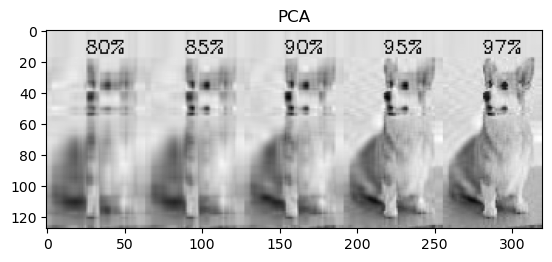

In [115]:
def PCA_img(percent,img):
    percent = percent/100
    img_pca = PCA(n_components = percent).fit(img)
    transform = img_pca.transform(img)
    pca_img = img_pca.inverse_transform(transform)
    return pca_img

imgs = np.array(cv.imread('./Testing_Image/corgi1.jpg'))
rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
resize_img = cv.resize(rgb,(64,128))
gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
a = PCA_img(80,gray)
b = PCA_img(85,gray)
c = PCA_img(90,gray)
d = PCA_img(95,gray)
e = PCA_img(97,gray)
a = cv.putText(a, '80%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
b = cv.putText(b, '85%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
c = cv.putText(c, '90%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
d = cv.putText(d, '95%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
e = cv.putText(e, '97%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))

add = cv.hconcat([a, b, c, d, e])
plt.title('PCA')
plt.imshow(add,cmap='gray')
plt.show()
    

# PCA + MinMAx

In [116]:
# PCA for Grayscale
X_train_scaled_pca = PCA(n_components=3240).fit(X_train_scaled)

# PCA for Canny Edge 
X_Edge_train_scaled_pca = PCA(n_components=3240).fit(X_Edge_train_scaled)

### Note:
#### Look at the Scree Plot & find n components base on the slowly increasing rate.

Text(0.5, 1.0, 'Scree plot for X Train Grayscale')

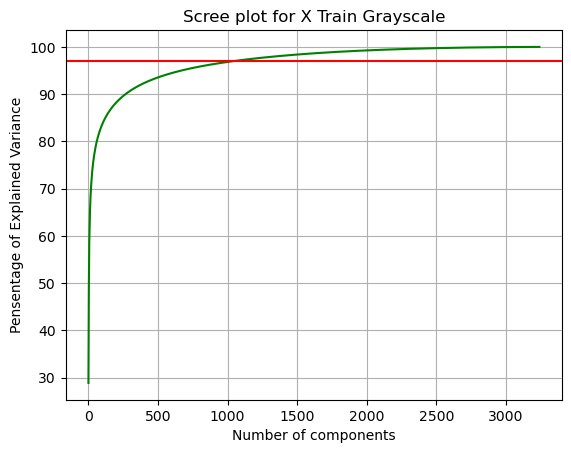

In [117]:
plt.grid()
plt.plot(np.cumsum(X_train_scaled_pca.explained_variance_ratio_ * 100), color='green')
plt.axhline(y=97,color='red')
plt.xlabel('Number of components')
plt.ylabel('Pensentage of Explained Variance')
plt.title('Scree plot for X Train Grayscale') 

# From the Scree Plot for X train Grayscale, We are choosing from 1250 components
-----------

Text(0.5, 1.0, 'Scree plot for X Train Canny Edge')

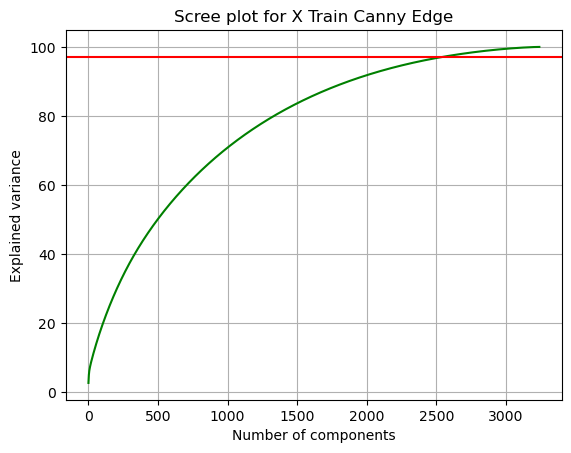

In [118]:
plt.grid()
plt.plot(np.cumsum(X_Edge_train_scaled_pca.explained_variance_ratio_ * 100), color='green')
plt.axhline(y=97,color='red')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot for X Train Canny Edge') 

# From the Scree Plot for X train Canny Edge, We are choosing from 2500 components

#

In [119]:
# Set n_components = 1250 based on the observation in Scree Plot
X_train_scaled_pca = PCA(n_components=0.97).fit(X_train_scaled)

# Set n_components = 2500 based on the observation in Scree Plot
X_Edge_train_scaled_pca = PCA(n_components=0.97).fit(X_Edge_train_scaled)

X_train_final = X_train_scaled_pca.transform(X_train_scaled)
X_test_final = X_train_scaled_pca.transform(X_test_scaled)

X_Edge_train_final = X_Edge_train_scaled_pca.transform(X_Edge_train_scaled)
X_Edge_test_final = X_Edge_train_scaled_pca.transform(X_Edge_test_scaled)

In [130]:
X_train_final
#(3240, 1044)

array([[ 2.34198857e+01,  3.32973242e+00, -2.64564944e+00, ...,
        -1.12062956e-01, -2.21495603e-01,  1.63789491e-01],
       [ 3.60211447e+01,  2.97444804e+00,  4.32771052e-01, ...,
        -4.20502419e-01, -1.51467311e-01, -1.38673704e-01],
       [ 8.91977255e+00, -3.78148869e-01, -1.41807517e+00, ...,
        -2.88720825e-01,  3.24799922e-01,  1.84692219e-01],
       ...,
       [-1.84633340e+00,  2.50078570e+01,  1.15180476e+01, ...,
        -4.77413700e-02, -5.52551824e-02,  1.19330593e-01],
       [-1.96301083e+01,  1.16369468e+01,  6.12495960e+00, ...,
         5.11078235e-02,  2.92125791e-02, -2.42727972e-02],
       [-1.43791952e+01,  1.48095661e+01,  6.46308545e+00, ...,
         6.51253959e-03, -1.10938964e-01, -2.66811280e-02]])

----------------
# PCA with HOG


train_hog_b4_norm <br>
train_HSV_b4_norm <br>
test_hog_b4_norm <br>
test_HSV_b4_norm <br>

In [121]:
# PCA for Grayscale
X_HOG_train_pca = PCA(n_components=3240).fit(train_hog_b4_norm)

# PCA for Canny Edge 
X_HSV_train_pca = PCA(n_components=3240).fit(train_HSV_b4_norm)

Text(0.5, 1.0, 'Scree plot for X Train Hog')

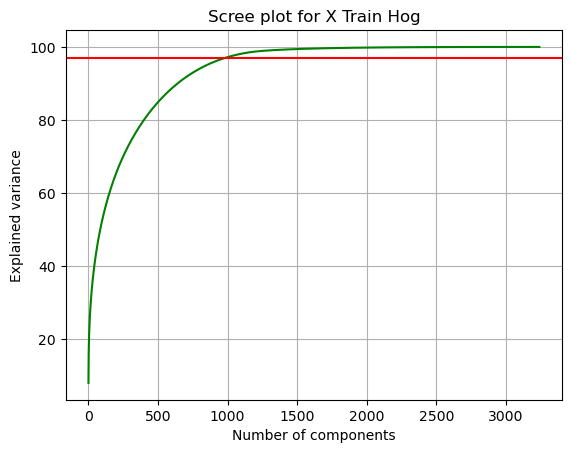

In [122]:
plt.grid()
plt.plot(np.cumsum(X_HOG_train_pca.explained_variance_ratio_ * 100),color='green')
plt.axhline(y=97,color='red')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot for X Train Hog') 

Text(0.5, 1.0, 'Scree plot for X Train HSV')

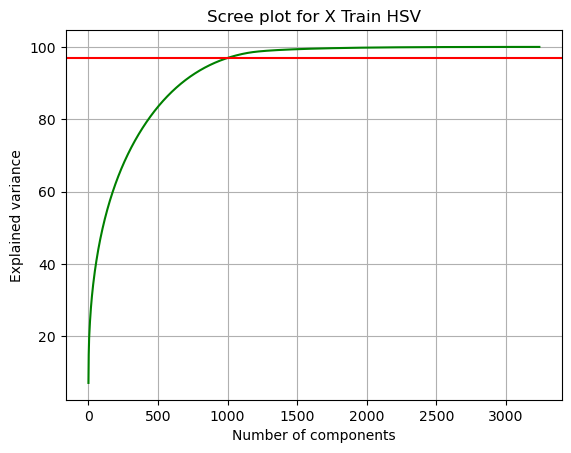

In [123]:
plt.grid()
plt.plot(np.cumsum(X_HSV_train_pca.explained_variance_ratio_ * 100),color='green')
plt.axhline(y=97,color='red')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot for X Train HSV') 

In [124]:
# PCA for Grayscale
X_HOG_train_pca = PCA(n_components=0.97).fit(train_hog_b4_norm)

# PCA for Canny Edge 
X_HSV_train_pca = PCA(n_components=0.97).fit(train_HSV_b4_norm)

X_HOG_train_final = X_HOG_train_pca.transform(train_hog_b4_norm)
X_HOG_test_final = X_HOG_train_pca.transform(test_hog_b4_norm)

X_HSV_train_final = X_HSV_train_pca.transform(train_HSV_b4_norm)
X_HSV_test_final = X_HSV_train_pca.transform(test_HSV_b4_norm)

In [132]:
# Training
train_final = pd.DataFrame(X_train_final)
train_hog_final = pd.DataFrame(X_HOG_train_final)
train_HSV_final = pd.DataFrame(X_HSV_train_final)
train_Edge_final = pd.DataFrame(X_Edge_train_final)

# Testing
test_final = pd.DataFrame(X_test_final)
test_hog_final = pd.DataFrame(X_HOG_test_final)
test_HSV_final = pd.DataFrame(X_HSV_test_final)
test_Edge_final = pd.DataFrame(X_Edge_test_final)



In [133]:
# To CSV
train_final.to_csv('X_train_final.csv', index = False)
train_hog_final.to_csv('X_HOG_train_final.csv', index = False)
train_HSV_final.to_csv('X_HSV_train_final.csv', index = False)
train_Edge_final.to_csv('X_Edge_train_final.csv', index = False)

test_final.to_csv('X_test_final.csv', index = False)
test_hog_final.to_csv('X_HOG_test_final.csv', index = False)
test_HSV_final.to_csv('X_HSV_test_final.csv', index = False)
test_Edge_final.to_csv('X_Edge_test_final.csv', index = False)

In [129]:
test_b4_norm

,0,1,2,3,4,5,6,7,8,9,...,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043
0,28.504798,5.733035,1.552645,-1.539512,-1.747775,0.526608,-2.595608,-3.844860,-4.888801,-1.745246,...,0.169934,-0.034772,0.028730,-0.212093,-0.106277,-0.158374,-0.020588,-0.179301,0.153428,-0.039517
1,-1.298659,-2.740860,3.889231,2.328454,-1.774081,1.409125,-9.123251,6.316579,-1.866675,1.747100,...,-0.013393,-0.030137,-0.049852,-0.180023,0.007823,-0.032593,-0.146930,0.233563,-0.212883,-0.133433
2,14.803419,-5.568822,14.647942,-1.510536,0.366571,0.889102,1.453527,1.071886,-2.650556,-1.817132,...,0.034521,0.038101,-0.068158,-0.083426,-0.097805,-0.041185,0.305292,0.046461,-0.061153,0.120516
3,-2.776865,-2.583546,-1.583426,-3.835795,-2.591262,-2.291952,-1.656207,-1.244190,1.445748,1.247622,...,-0.005416,-0.202518,0.051338,-0.047153,-0.220794,0.031663,0.207342,0.466009,-0.118275,-0.088898
4,26.533041,-3.251610,-3.067201,-1.683242,5.068957,-0.569579,-3.952035,2.807401,-0.336899,-0.972192,...,0.155901,-0.024619,-0.039406,0.000105,-0.020762,0.067975,-0.150350,0.022610,-0.028861,-0.116090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,-8.706932,1.589757,1.750962,2.771167,3.420112,1.558152,-6.617794,-1.487342,-1.252114,3.000790,...,0.194976,0.074498,-0.193524,-0.039510,0.206144,0.012561,0.050053,-0.155510,-0.259981,-0.114801
104,1.025064,2.778074,-6.565961,-8.915261,2.277646,1.097663,-0.860740,-5.093103,2.295143,-2.037417,...,0.058621,-0.231356,0.143547,0.198768,0.164255,0.105089,-0.032751,-0.104991,-0.165917,-0.008848
105,5.524626,9.451757,-16.375754,-4.596152,-2.591835,-1.043161,-3.663911,-6.788874,-1.740463,-0.958940,...,-0.009740,0.077431,0.095462,-0.297768,0.125056,0.050279,0.263965,-0.199793,-0.134090,-0.199383
106,13.945590,-5.938903,-3.136094,-6.654652,1.264372,-0.546211,-1.361716,-1.824055,-1.340430,1.936021,...,-0.014891,-0.050657,0.095649,0.146566,-0.148574,-0.014634,-0.095189,-0.047493,0.065204,-0.094394


In [134]:
test_final

,0,1,2,3,4,5,6,7,8,9,...,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043
0,28.504798,5.733035,1.552645,-1.539512,-1.747775,0.526608,-2.595608,-3.844860,-4.888801,-1.745246,...,0.169934,-0.034772,0.028730,-0.212093,-0.106277,-0.158374,-0.020588,-0.179301,0.153428,-0.039517
1,-1.298659,-2.740860,3.889231,2.328454,-1.774081,1.409125,-9.123251,6.316579,-1.866675,1.747100,...,-0.013393,-0.030137,-0.049852,-0.180023,0.007823,-0.032593,-0.146930,0.233563,-0.212883,-0.133433
2,14.803419,-5.568822,14.647942,-1.510536,0.366571,0.889102,1.453527,1.071886,-2.650556,-1.817132,...,0.034521,0.038101,-0.068158,-0.083426,-0.097805,-0.041185,0.305292,0.046461,-0.061153,0.120516
3,-2.776865,-2.583546,-1.583426,-3.835795,-2.591262,-2.291952,-1.656207,-1.244190,1.445748,1.247622,...,-0.005416,-0.202518,0.051338,-0.047153,-0.220794,0.031663,0.207342,0.466009,-0.118275,-0.088898
4,26.533041,-3.251610,-3.067201,-1.683242,5.068957,-0.569579,-3.952035,2.807401,-0.336899,-0.972192,...,0.155901,-0.024619,-0.039406,0.000105,-0.020762,0.067975,-0.150350,0.022610,-0.028861,-0.116090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,-8.706932,1.589757,1.750962,2.771167,3.420112,1.558152,-6.617794,-1.487342,-1.252114,3.000790,...,0.194976,0.074498,-0.193524,-0.039510,0.206144,0.012561,0.050053,-0.155510,-0.259981,-0.114801
104,1.025064,2.778074,-6.565961,-8.915261,2.277646,1.097663,-0.860740,-5.093103,2.295143,-2.037417,...,0.058621,-0.231356,0.143547,0.198768,0.164255,0.105089,-0.032751,-0.104991,-0.165917,-0.008848
105,5.524626,9.451757,-16.375754,-4.596152,-2.591835,-1.043161,-3.663911,-6.788874,-1.740463,-0.958940,...,-0.009740,0.077431,0.095462,-0.297768,0.125056,0.050279,0.263965,-0.199793,-0.134090,-0.199383
106,13.945590,-5.938903,-3.136094,-6.654652,1.264372,-0.546211,-1.361716,-1.824055,-1.340430,1.936021,...,-0.014891,-0.050657,0.095649,0.146566,-0.148574,-0.014634,-0.095189,-0.047493,0.065204,-0.094394


-----------
# Load CSV

In [146]:
X_train_finalV = pd.read_csv('./ReadyToTrainCSV/X_train_final.csv')
X_HOG_train_finalV = pd.read_csv('./ReadyToTrainCSV/X_HOG_train_final.csv')
X_HSV_train_finalV = pd.read_csv('./ReadyToTrainCSV/X_HSV_train_final.csv')
X_Edge_train_finalV = pd.read_csv('./ReadyToTrainCSV/X_Edge_train_final.csv')

X_test_finalV = pd.read_csv('./ReadyToTrainCSV/X_test_final.csv')
X_HOG_test_finalV = pd.read_csv('./ReadyToTrainCSV/X_HOG_test_final.csv')
X_HSV_test_finalV = pd.read_csv('./ReadyToTrainCSV/X_HSV_test_final.csv')
X_Edge_test_finalV = pd.read_csv('./ReadyToTrainCSV/X_Edge_test_final.csv')

y_train_lb = y_train 
y_HSV_train_lb = y_HSV_train 
y_HOG_train_lb = y_HOG_train 
y_Edge_train_lb = y_Edge_train 

y_test_lb = y_test 
y_HSV_test_lb = y_HSV_test 
y_HOG_test_lb = y_HOG_test 
y_Edge_test_lb = y_Edge_test 

---------------
# Modeling (KNN,RF,SVM)

## KNN

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors = 40  ,weights = 'distance', p = 2)
neigh.fit(X_train_finalV, y_train_lb) 
y_pred = neigh.predict(X_test_finalV)
scores = accuracy_score(y_test_lb,y_pred)
print(scores)

0.5833333333333334


In [184]:
kVals = np.arange(1,100,1)
dis_accuray_w = []
for k in kVals:
    
    model = KNeighborsClassifier(n_neighbors=k,weights = 'distance', p = 2)
    model.fit(X_train_finalV, y_train_lb) 
    
    # evaluate the model and update the accuracies list
    score = model.score(X_test_finalV,y_test_lb)
    dis_accuray_w.append(score*100)
    #print("k=%d, accuracy=%.2f%%" % (k, score * 100))


In [175]:
kVals = np.arange(1,100,2)
dis_accuray_u = []
for k in kVals:
    
    model = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2)
    model.fit(X_train_finalV, y_train_lb) 
    
    # evaluate the model and update the accuracies list
    score = model.score(X_test_finalV,y_test_lb)
    dis_accuray_u.append(score*100)
    #print("k=%d, accuracy=%.2f%%" % (k, score * 100))

/Users/hongip/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/hongip/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

Text(0, 0.5, 'Accuracy%')

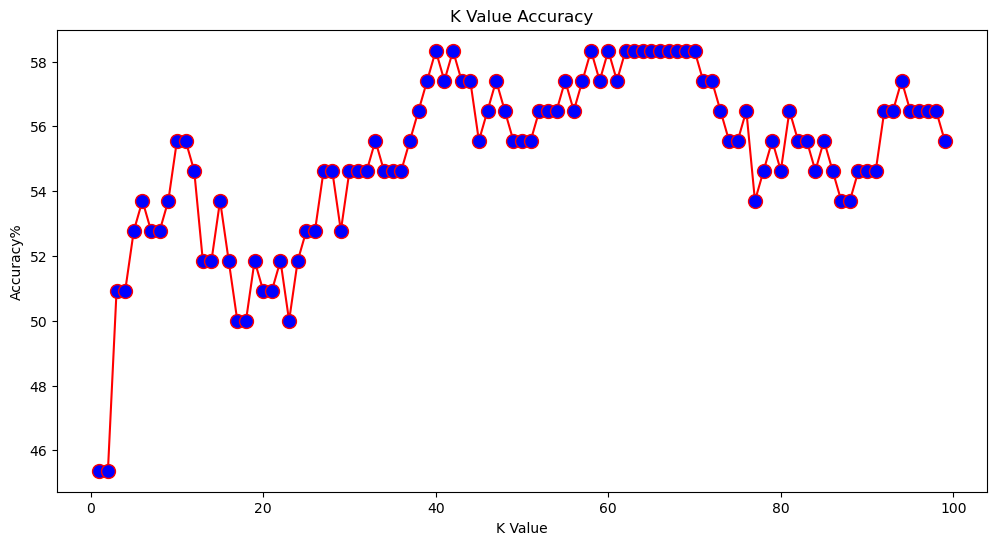

In [191]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), dis_accuray_w, color='red', 
        marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy%')

In [182]:
len(dis_accuray_w)

50